<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
    # pandas is a software library written for the Python programming language for data manipulation and analysis.
    import pandas as pd
    #NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
    import numpy as np
    # Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
    import matplotlib.pyplot as plt
    #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
    import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


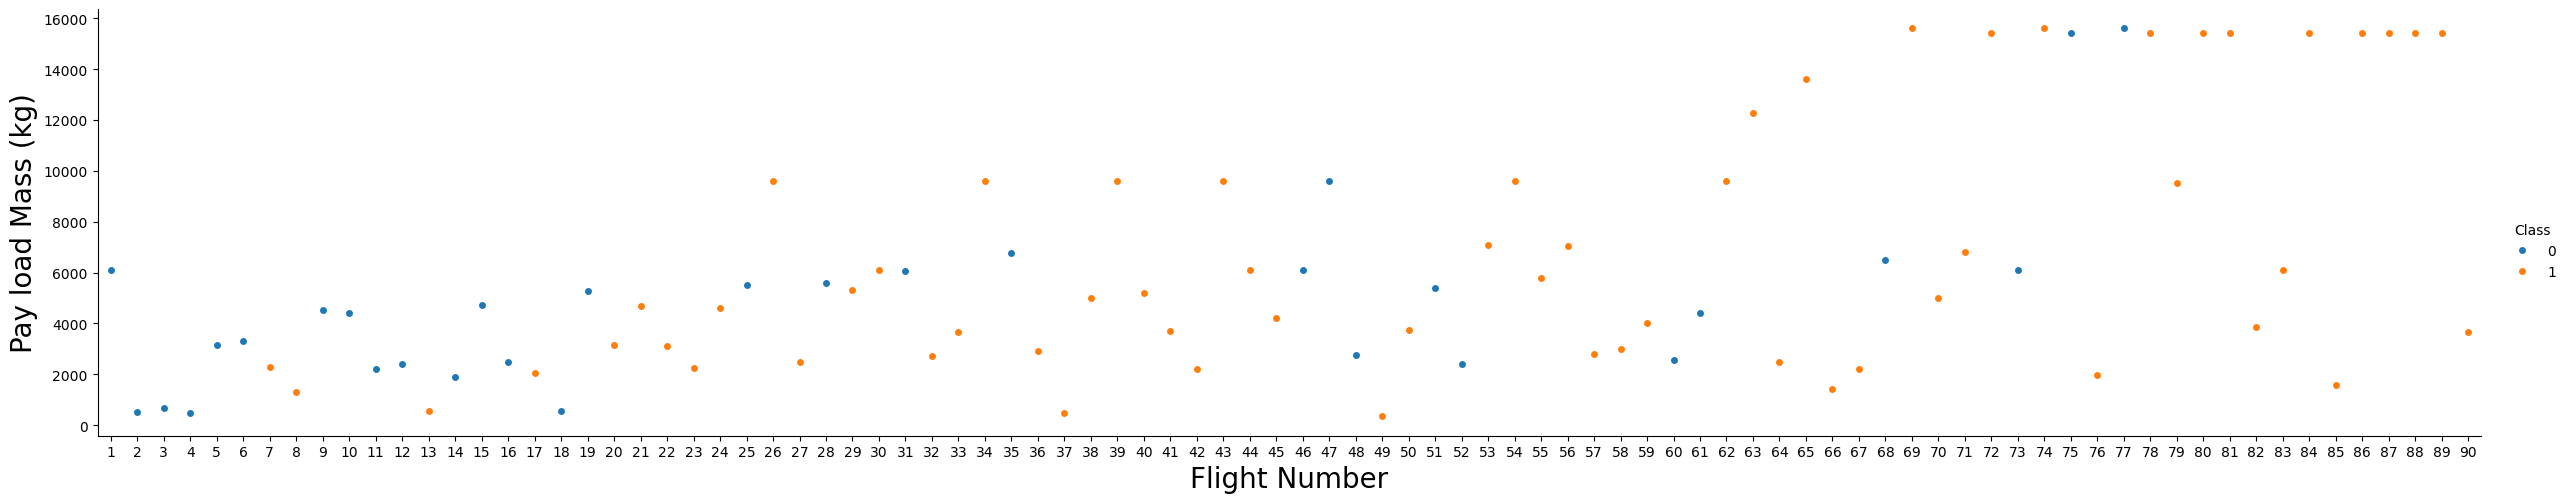

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


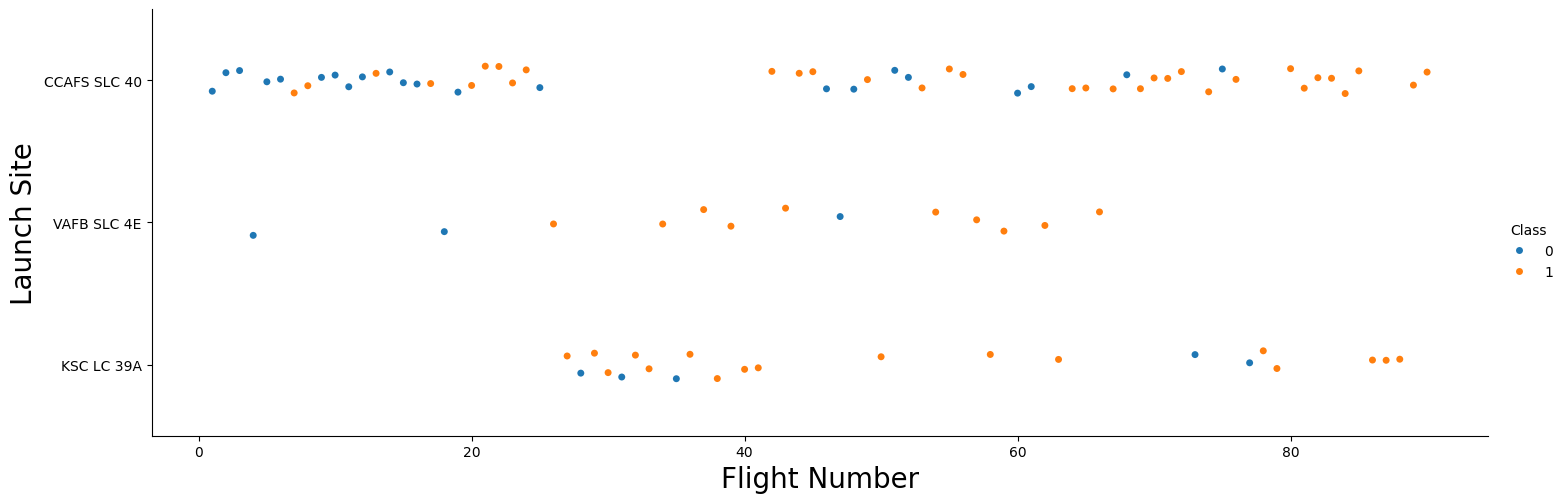

In [7]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Use seaborn.catplot to visualize the relationship between FlightNumber and LaunchSite
# The 'hue' parameter colors the points based on the 'class' column (success/failure)
# The column name 'class' has been changed to 'Class' to fix the ValueError
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=3)

# Set the labels for the x and y axes with a larger font size for clarity
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

# Display the plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Based on the scatter plot for FlightNumber vs. LaunchSite, here are some of the key patterns you can observe:

CCAFS SLC-40: This was a very active launch site with a large number of flights, especially in the earlier part of the dataset (lower flight numbers). It shows a mix of successes (blue dots) and failures (red dots) in the beginning. As the flight numbers increase, the successes become more frequent, indicating an improvement in reliability over time.

VAFB SLC-4E: This site has a smaller number of missions compared to CCAFS SLC-40. The plot suggests a very high success rate from the start, with most of its missions resulting in a successful outcome (blue dots).

KSC LC-39A: This launch site, which was used later in the timeline (higher flight numbers), appears to have a very strong success record. The majority of the flights from this location are marked as successful, with very few, if any, failures.

Overall Trend: Across all three launch sites, there is a clear trend toward a higher number of successful missions as the FlightNumber increases. The earlier flights (left side of the plot) show a greater proportion of failures, while the later flights (right side of the plot) are almost entirely successful. This pattern demonstrates the company's continuous improvement and learning over the course of its missions.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


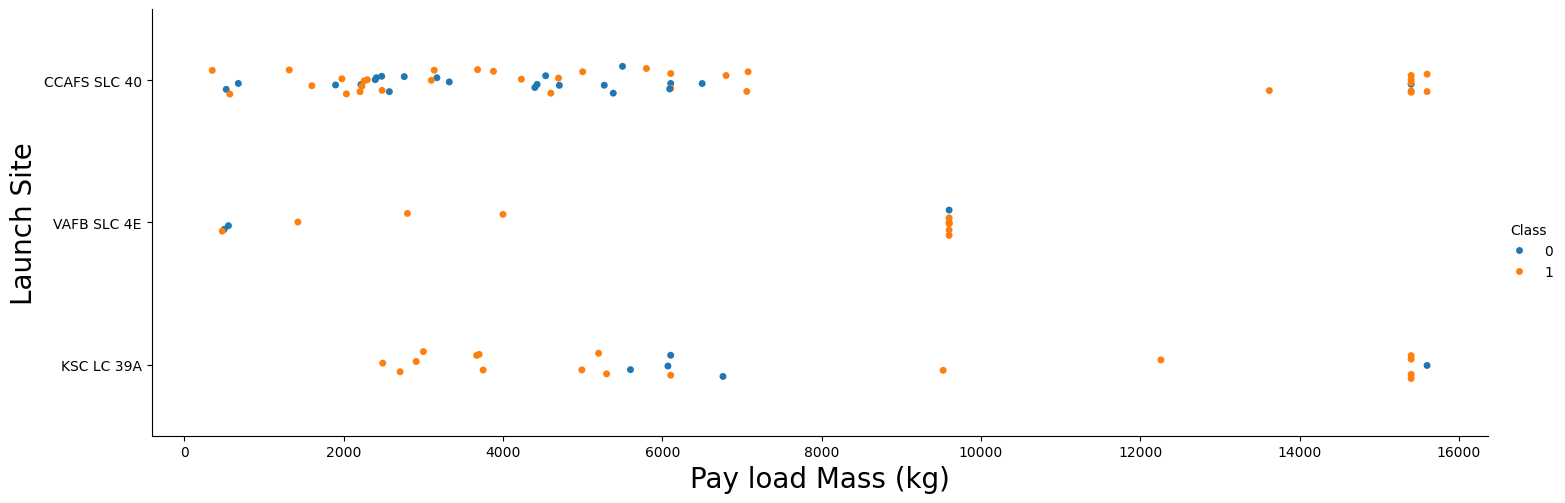

In [8]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Use seaborn.catplot to visualize the relationship between PayloadMass and LaunchSite
# The 'hue' parameter colors the points based on the 'Class' column (success/failure)
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=3)

# Set the labels for the x and y axes with a larger font size for clarity
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

# Display the plot
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


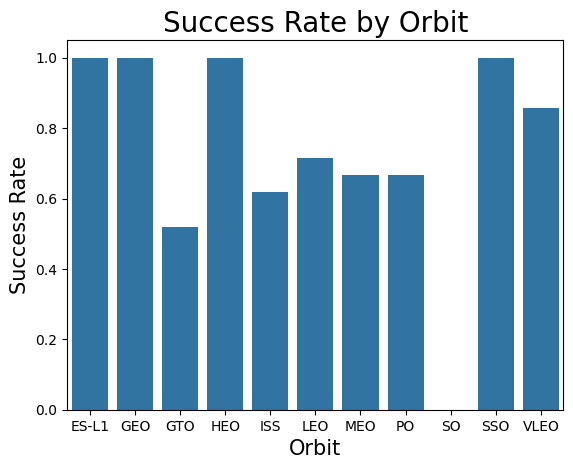

In [9]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Calculate the success rate for each orbit by grouping by 'Orbit' and taking the mean of 'Class'
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Use seaborn.barplot to create a bar chart of the success rate for each orbit
sns.barplot(x="Orbit", y="Class", data=success_rate_by_orbit)

# Set the title and labels for the plot with a larger font size for clarity
plt.title("Success Rate by Orbit", fontsize=20)
plt.xlabel("Orbit", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)

# Display the plot
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


Based on the bar chart generated by the code, you can identify the orbits with the highest success rates by looking at the height of each bar. Orbits with a bar reaching the top of the chart (representing a success rate of 1.0) have a 100% success rate.

The following orbits have a perfect success rate, with every mission launched to them being a success:

GEO (Geostationary Orbit)

HEO (Highly Elliptical Orbit)

SSO (Sun-Synchronous Orbit)

You will also notice that orbits such as ES-L1, SO, and GTO have very high success rates, though not a perfect 1.0. In contrast, other orbits like LEO and VLEO have lower success rates, and ISS has a moderate success rate. This visualization effectively highlights which orbital destinations have been the most reliable for launches in this dataset.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


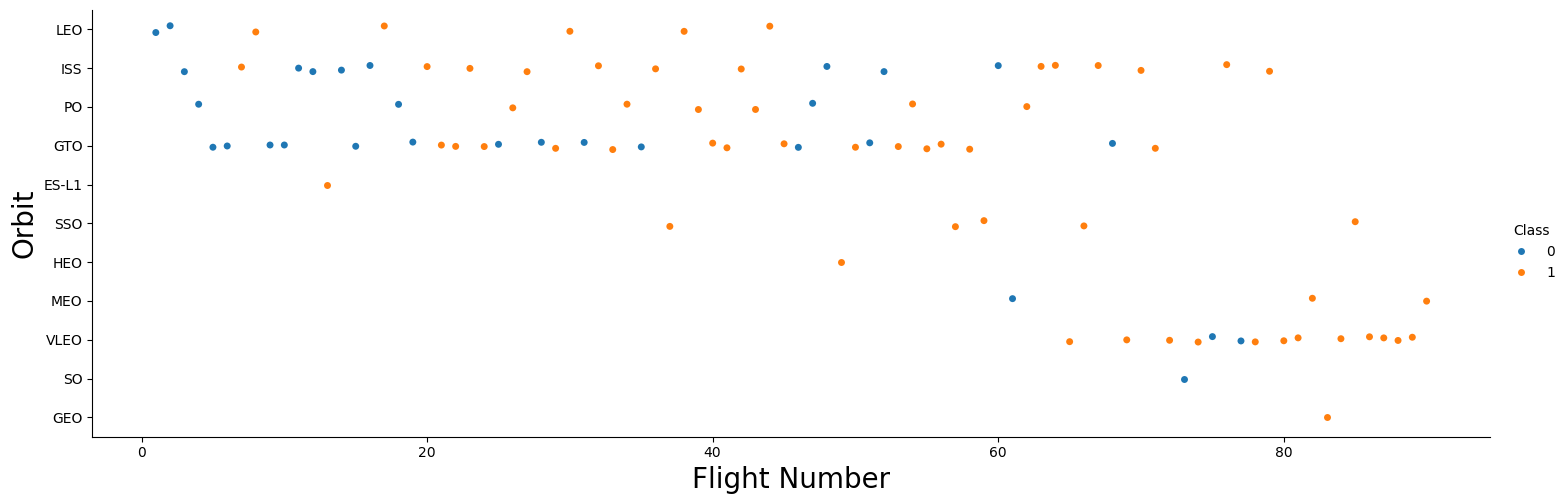

In [10]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Use seaborn.catplot to visualize the relationship between FlightNumber and Orbit
# The 'hue' parameter colors the points based on the 'Class' column (success/failure)
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=3)

# Set the labels for the x and y axes with a larger font size for clarity
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)

# Display the plot
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


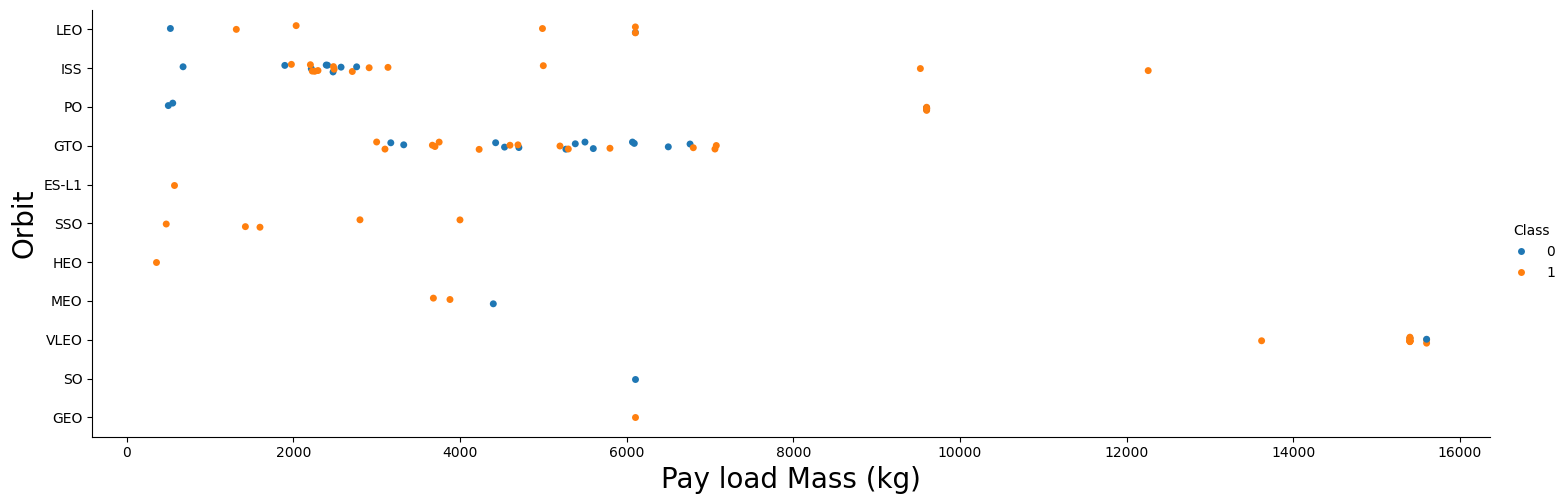

In [12]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Use seaborn.catplot to visualize the relationship between PayloadMass and Orbit
# The 'hue' parameter colors the points based on the 'Class' column (success/failure)
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=3)

# Set the labels for the x and y axes with a larger font size for clarity
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)

# Display the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


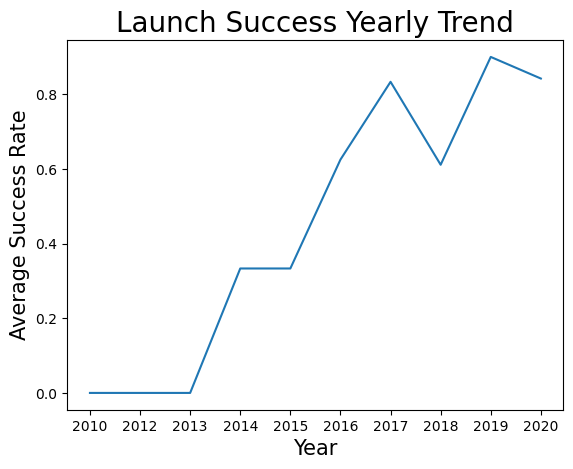

In [13]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# A function to Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.split("-")[0])

# Update the 'Date' column with just the year
df['Year'] = Extract_year(df['Date'])

# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plot a line chart with 'Year' on the x-axis and 'Class' (average success rate) on the y-axis
sns.lineplot(x="Year", y="Class", data=yearly_success_rate)

# Set the title and labels for the plot with a larger font size for clarity
plt.title("Launch Success Yearly Trend", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)

# Display the plot
plt.show()


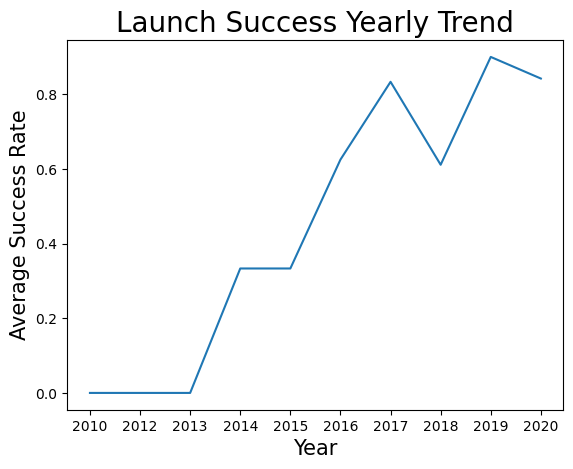

In [14]:
# Import necessary libraries
import piplite
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# A function to Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.split("-")[0])

# Update the 'Date' column with just the year
df['Year'] = Extract_year(df['Date'])

# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plot a line chart with 'Year' on the x-axis and 'Class' (average success rate) on the y-axis
sns.lineplot(x="Year", y="Class", data=yearly_success_rate)

# Set the title and labels for the plot with a larger font size for clarity
plt.title("Launch Success Yearly Trend", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)

# Display the plot
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [16]:
# Import necessary libraries
import piplite
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# A function to Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.split("-")[0])

# Update the 'Date' column with just the year
df['Year'] = Extract_year(df['Date'])

# Select the features that will be used in the success prediction model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding to the specified categorical columns
# The get_dummies() function converts categorical columns into a series of binary columns
# The prefix argument adds a descriptive label to the new column names
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Display the first 5 rows of the new features_one_hot DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [17]:
# Import necessary libraries
import piplite
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# A function to Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.split("-")[0])

# Update the 'Date' column with just the year
df['Year'] = Extract_year(df['Date'])

# Select the features that will be used in the success prediction model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding to the specified categorical columns
# The get_dummies() function converts categorical columns into a series of binary columns
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Cast the entire DataFrame to the float64 data type
features_one_hot = features_one_hot.astype('float64')

# Display the first 5 rows of the new features_one_hot DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [18]:
# Import necessary libraries
import piplite
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install any required packages. Note that this is typically used in environments like Pyodide.
await piplite.install(['seaborn'])

# Fetch the dataset from the provided URL
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# A function to Extract years from the date
def Extract_year(date_series):
    return date_series.apply(lambda x: x.split("-")[0])

# Update the 'Date' column with just the year
df['Year'] = Extract_year(df['Date'])

# Select the features that will be used in the success prediction model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding to the specified categorical columns
# The get_dummies() function converts categorical columns into a series of binary columns
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Cast the entire DataFrame to the float64 data type
features_one_hot = features_one_hot.astype('float64')

# Display the first 5 rows of the new features_one_hot DataFrame
features_one_hot.head()

# Export the features_one_hot DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->
